# Проект: Анализ оттока клиентов банка

# Описание проект:


**Колонки:**

**USERID** — идентификатор пользователя,

**score** — баллы кредитного скоринга,

**city** — город,

**gender** — пол,

**age** — возраст,

**equity** — количество баллов собственности

**balance** — баланс на счёте,

**products** — количество продуктов, которыми пользуется клиент,

**credit_card** — есть ли кредитная карта,

**last_activity** — активный клиент,

**est_salary** — оценочный доход клиента,

**сhurn** — признак оттока.

# Задача проекта:

**Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.**

Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)

Сформулируйте и проверьте статистические гипотезы.

Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование.

Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации

# Ход работы(декомпозиция):

**1. Загрузка и ознакомление с данными.**

**2. Подготовка и предобработка данных.**
- Проверка на наличие пропусков.
- Проверка на наличие явных и неявных дубликатов.
- Проверка исправности в названиях колонок и соблюдение типов данных.
- Кодирование, необходимый в анализе корреляции

**3. Исследовательский анализ данных(EDA).**
- Построение и анализ распределения оттока по признакам.
- Корреляционный анализ.

**4. Составление и проверка статистических гипотез.**
- Составление гипотез и теоретическое обосвание для дальнейших проверок.
- Проверка гипотез.

**5. Подведение промежуточных выводов.**
- Вывод по полученным результатам их 3 и 4 пункта, написание набросков по портретам клиентов, имеющие свойство оттока.

**6. Сегментация.**
- Группировка клиентов по признакам, имеющие отток лучше, чем средний уровень оттока по банку(в группе более 500 клиентов, 2-3 признака).

**7. Приоритизация сегментов.**
- Сортировка созданных групп(сегментов) по важности для банка, отдела маркетинга. По проценту оттока.

**8. Формирование общего вывода и ремендаций для отдела маркетинга.**

## Загрузка и ознакомление с данными

### Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
import math as mth
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from plotly import graph_objects as go

try:
    import phik
except:
    !pip install phik -q

    
import phik
from phik import phik_matrix

In [2]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
df.head(5)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


**Данный датасет имеет 12 столбцов, 10000 строк. Имеются пропуски, с которыми необходимо разобраться, а именно определить их природу возникновения и прийти к верному решению. Необходимо отредактировать наименования столбцов по нормам.**

## Подготовка и предобработка данных

### Изменение наименования столбцов

In [6]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id'})
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


### Проверка на наличие пропусков

In [7]:
df.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [8]:
# найдём процент пропущенных значений в столбцах
df.isna().sum()/len(df)*100

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

**Процент пропущенных значение в столбце age составляет менее 5%, поэтому может оставить без изменений. А столбец balance, почти 23%. Поэтому выясним природу пропусков.**

**Пропуски могут быть:**

- MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;
- MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;
- MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

**Изучим более подробно пропуски в колонке balance для принятия решения. Для этого создадим новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено.**

In [9]:
df_bal=df.copy()

In [10]:
df_bal['bal_pass'] = df_bal['balance'].isnull().astype(int)
df_bal.drop('user_id', axis= 1 , inplace= True )

In [11]:
continuous_signs = ['score', 'age', 'balance', 'est_salary']

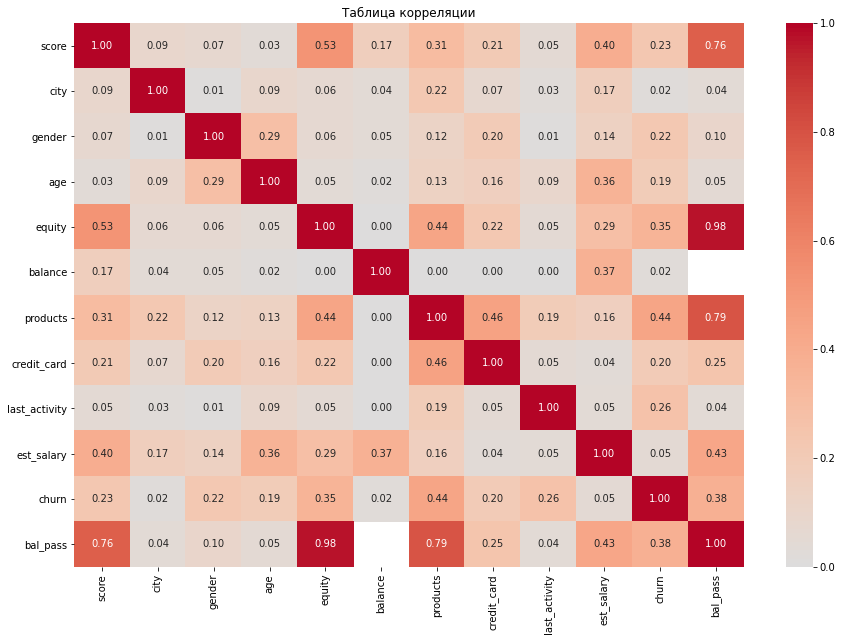

In [12]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(df_bal.phik_matrix(interval_cols = continuous_signs),
            center=0,
            annot = True,
            fmt = '.2f',
            cmap='coolwarm',
            ax = axes)
plt.title('Таблица корреляции')
plt.show()

#### ВЫВОД: По графику корреляци признаков видим что есть зависимость между пропусками в балансе и количеством баллов собственности(equity) . А так же присутсвует зависимость с количеством продуктов(products) и баллами кредитного скорринга(score). То есть, пропуски зависят от данных и их стоить оставить без изменений.

Следовательно, пропуски относятся к MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

### Проверка на наличие явных и неявных дубликатов

In [13]:
# проверка на наличие явных дубликатов
df.duplicated().sum()

0

In [14]:
# проверка на наличие неявных дубликатов
df.duplicated(subset=['user_id']).sum()

73

In [15]:
df[df.duplicated(subset = ['user_id'], keep = False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [16]:
# рассмотрим отдельные примеры, для выяснения природы дубликатов
df.loc[df['user_id'] == 217412]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7055,217412,879.0,Рыбинск,М,42.0,5,568140.15,3,0,0,231658.67,1
9880,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


In [17]:
df.loc[df['user_id'] == 190253]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0


In [18]:
df.loc[df['user_id'] == 164676]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
7271,164676,790.0,Рыбинск,Ж,77.0,1,111202.01,1,1,0,32835.45,0


#### ВЫВОД: При проверки на наличие явных и неявных дубликатов, было получено. Отсутсвуют явные дубликаты, но присутсвуют неявные. После уточнения и выяснения их природы, было принято решение, оставить без изменений, так как эти неявные дубликаты не имеют схожести, только по user_id.

## Исследовательский анализ данных(EDA)

### Распределение зависимости числовых признаков

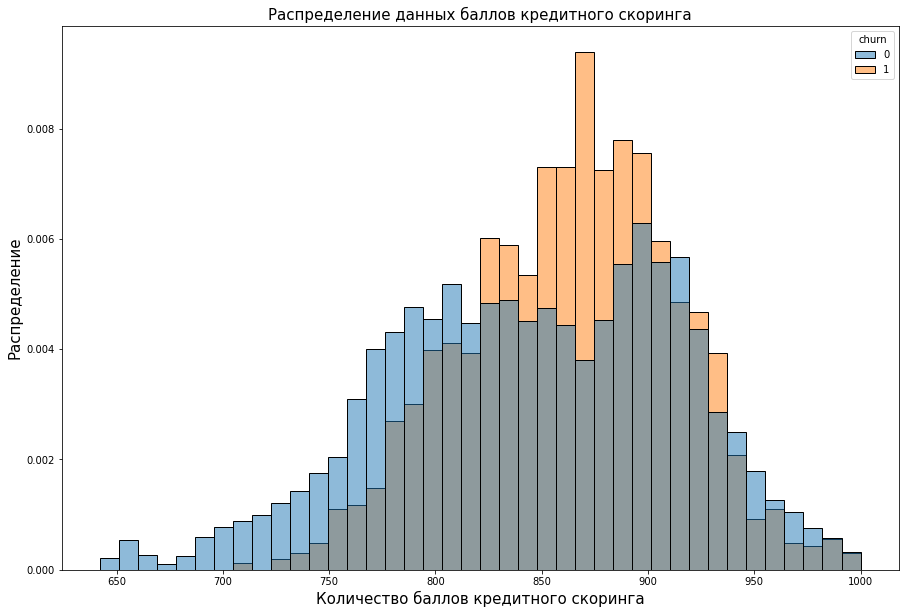

In [19]:
# Распределение данных баллов кредитного скоринга
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='score', hue='churn', stat='density', common_norm=False, bins = 40)
plt.xlabel('Количество баллов кредитного скоринга', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение данных баллов кредитного скоринга', size=15)
plt.show()

**По полученной визуализации заметен пик оттока у пользователей, имеющие количество баллов кредитного скоринга в диапазоне 820-900 баллов.**

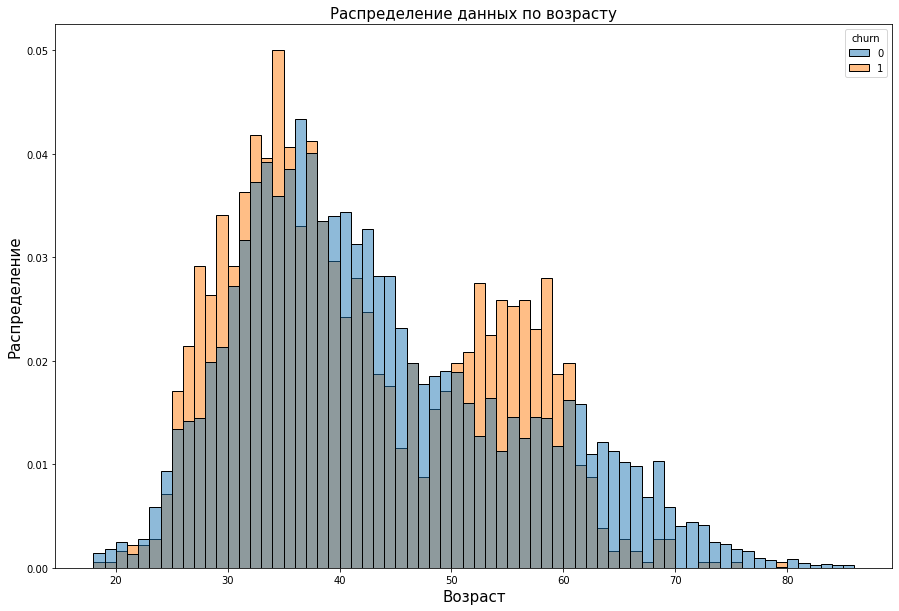

In [20]:
# Распределение данных по возрасту
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='age', hue='churn', stat='density', common_norm=False, bins = 69, binwidth=1)
plt.xlabel('Возраст', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение данных по возрасту', size=15)
plt.show()

**По данной визуализации заметы две группы пользователей, пребывающие в возрасте от 25 до 35 лет и 50 до 60.**

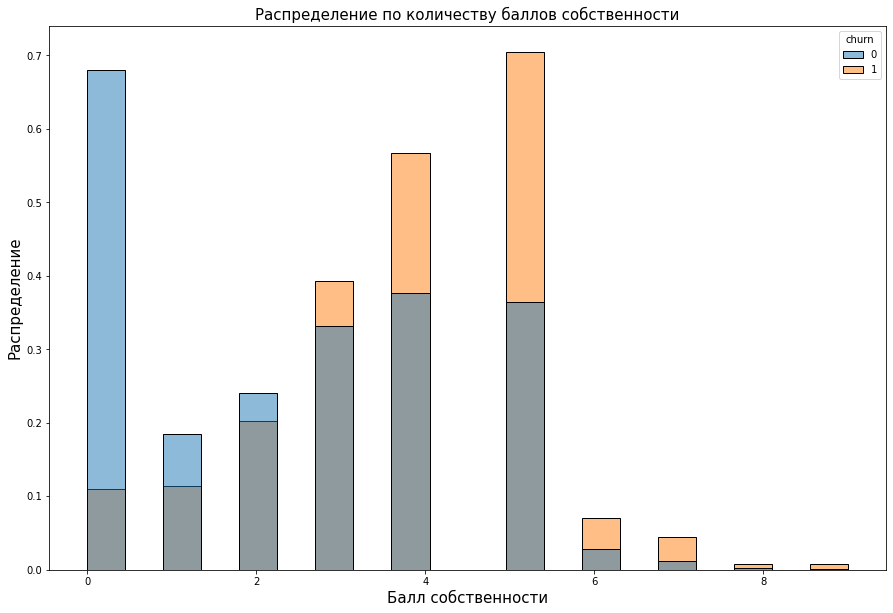

In [21]:
# Распределение по количеству баллов собственности
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='equity', hue='churn', stat='density', common_norm=False, bins = 20)
plt.xlabel('Балл собственности', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по количеству баллов собственности', size=15)
plt.show()

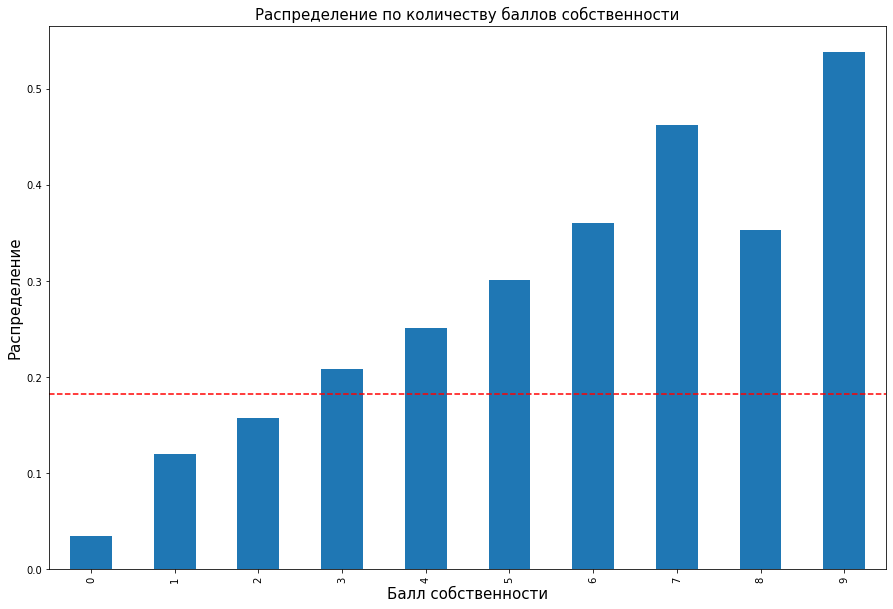

In [22]:
# Распределение по количеству баллов собственности
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['equity'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Балл собственности', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по количеству баллов собственности', size=15)
plt.show()

**На данной диаграмме видим, что отток пользователей начинается с 3 баллов собственности до 9.**

In [23]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

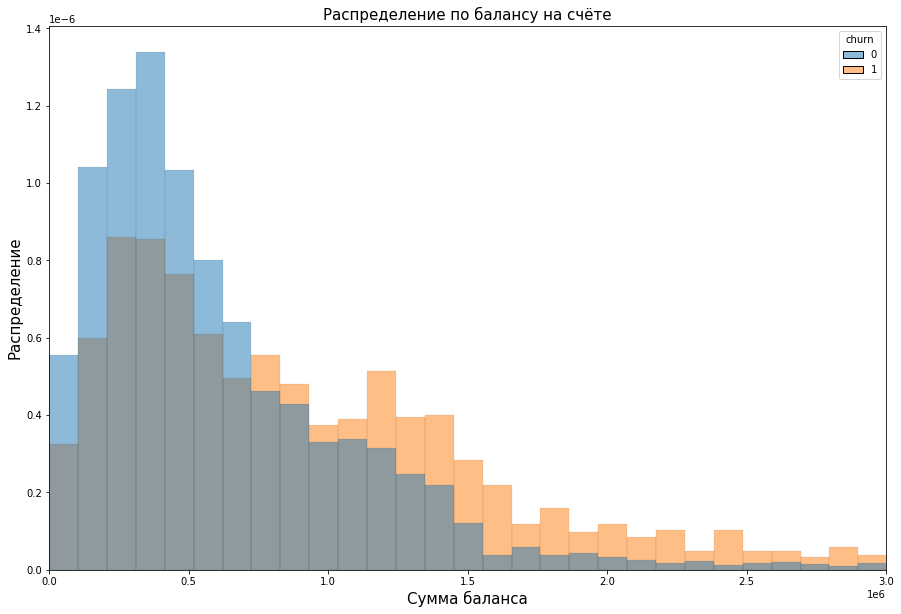

In [24]:
# Распределение по балансу на счёте
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='balance', hue='churn', stat='density', common_norm=False, bins = 1150)
axs.set_xlim([0, 3000000])
plt.xlabel('Сумма баланса', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по балансу на счёте', size=15)
plt.show()

**Те, кто имеет более 1*10^6, более склонны к оттоку. Следовательно, чем больше баланс, тем больше вероятность оттока.**

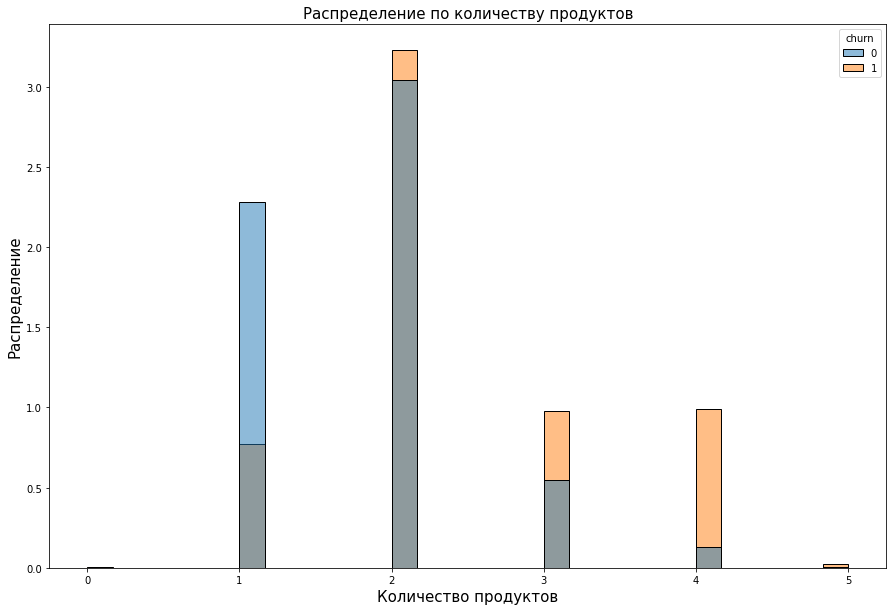

In [25]:
# Распределение по количеству продуктов
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='products', hue='churn', stat='density', common_norm=False, bins = 30)
plt.xlabel('Количество продуктов', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по количеству продуктов', size=15)
plt.show()

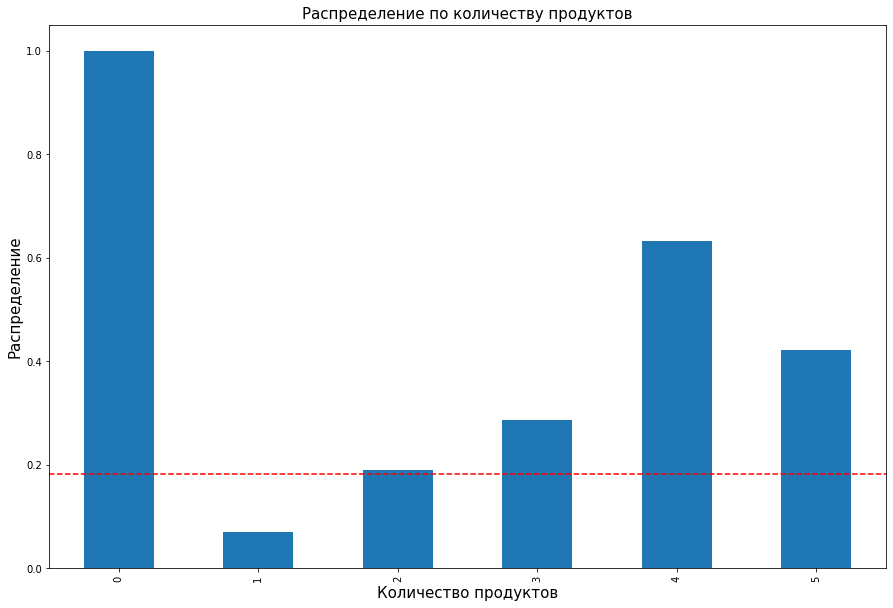

In [26]:
# Распределение по количеству продуктов
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['products'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Количество продуктов', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по количеству продуктов', size=15)
plt.show()

In [27]:
df['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

**Итого, пользователи, которые имеют более 2 продуктов более склонны к оттоку.**

<div class="alert alert-info"> <b>Комментарии студента:</b> Пользователь всего 1, с количеством продуктов равным 0. И так как мы строим распределение, один клиента с 0 продуктов является отточным, поэтому выглядит аномально. В целом быть клиентом банка, не имея продуктов, странно. Возможна ошибка в данных.</div>

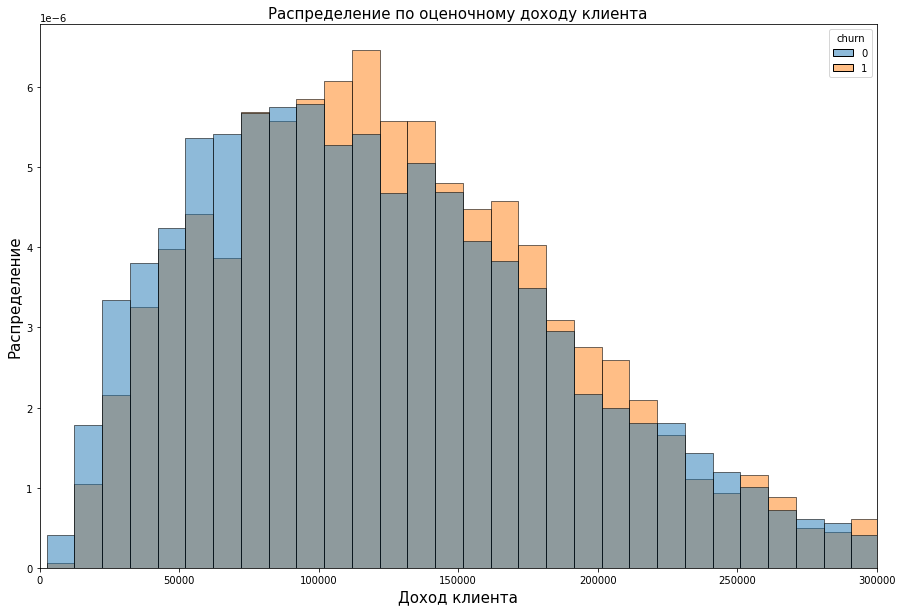

In [28]:
# Распределение по оценочному доходу клиента
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(data=df, x='est_salary', hue='churn', stat='density', common_norm=False, bins = 140)
axs.set_xlim([0, 300000])
plt.xlabel('Доход клиента', size=15)
plt.ylabel('Распределение', size=15)
plt.title('Распределение по оценочному доходу клиента', size=15)
plt.show()

**Явных всплесков и зависимостей нет, по всему наблюдению присутсвют оба рассматриваемых случая. Но если рассматривать в разрезе от 100000 до 200000, то можно сделать заключение, что чем выше доход клиента, тем больше шанс оттока.**

### Распределение зависимости категориальных и отдельных признаков

**city** — город
**gender** — пол
**credit_card** — есть ли кредитная карта
**last_activity** — активный клиент

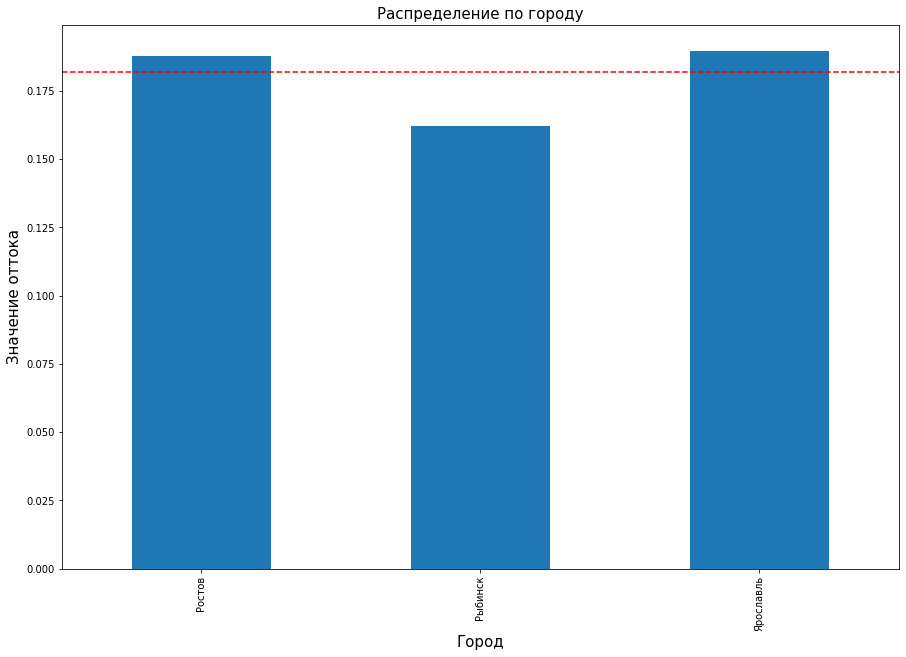

In [29]:
# Распределение по городу
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['city'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Город', size=15)
plt.ylabel('Значение оттока', size=15)
plt.title('Распределение по городу', size=15)
plt.show()

**По полученным данным, заметно, что нет явных перепадов, но два города выше среднего показателя оттока, это Ростов и Ярославль.**

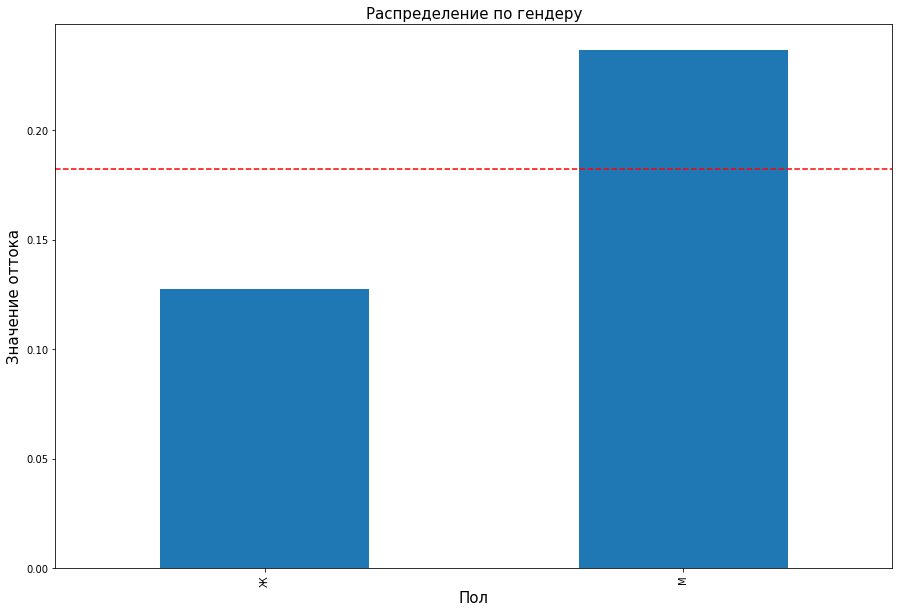

In [30]:
# Распределение по гендеру
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['gender'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Пол', size=15)
plt.ylabel('Значение оттока', size=15)
plt.title('Распределение по гендеру', size=15)
plt.show()

**Мужчины имеют показатель выше среднего по оттоку, чем женщины.**

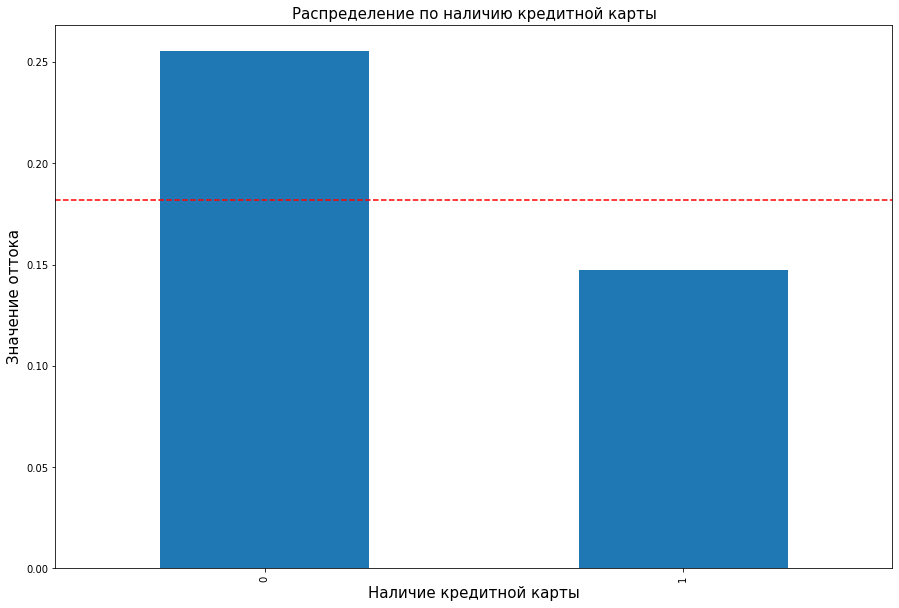

In [31]:
# Распределение по наличию кредитной карты
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['credit_card'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Наличие кредитной карты', size=15)
plt.ylabel('Значение оттока', size=15)
plt.title('Распределение по наличию кредитной карты', size=15)
plt.show()

**Клиенты, у которые нет кредитной карты, имеют наивысший показатель оттока, чем клиенты с кредитной карты. Так же пользователи без кредитной карты выше среднего показателя.**

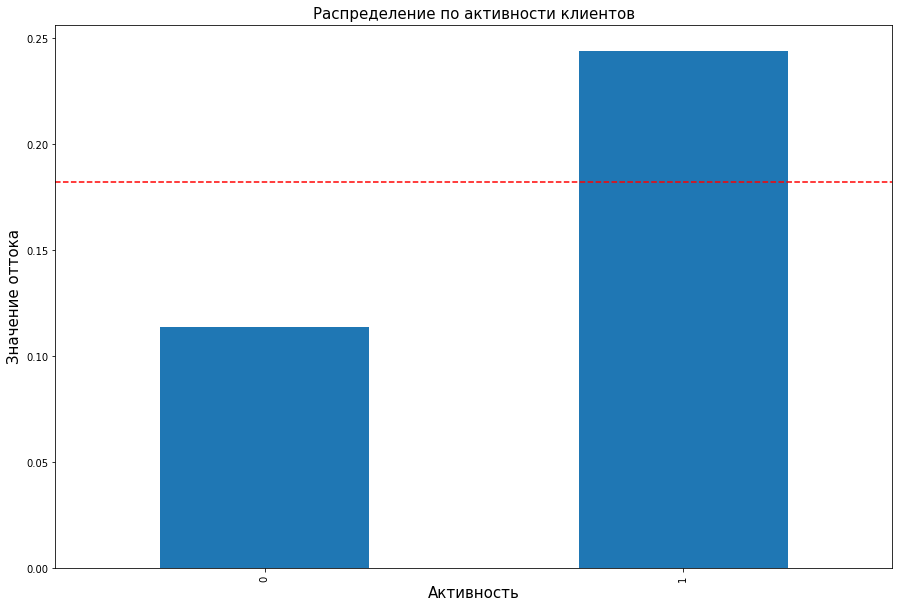

In [32]:
# Распределение по активности клиентов
fig, ax = plt.subplots(figsize=(15, 10))
df.groupby(['last_activity'])['churn'].mean().plot(kind='bar', ax=ax)
churn_avg = df['churn'].mean()
ax.axhline(churn_avg, color='r', linestyle='--')
plt.xlabel('Активность', size=15)
plt.ylabel('Значение оттока', size=15)
plt.title('Распределение по активности клиентов', size=15)
plt.show()

**Активные клиенты имеют показатель выше среднего по оттоку.**

#### ВЫВОД 3.1-3.2: 
**На основании проведенного исследоватльского анализа всех по всем признакам, мы имеем, что склонность к оттоку повышена у:**

- Пользователей с баллом кредитного скоринга в диапазоне 820-900 баллов.;
- Клиентов в возрастной группе от 25 до 30 лет и 52 до 60.;
- С оценкой собственности от 3 до 9;
- С балансом более 1млн;
- Клиентов с количеством продуктов более 2;
- Пользователей из городов Ростов и Ярославль;
- Мужчин
- Клиентов не имеющие крединой карты;
- Активных клиентов.

### Корреляционный анализ

In [33]:
# сделаем копию, чтобы не изменять изначальныое название фрейма
df_corr=df.copy()

In [34]:
# удалим столбец с индификатором, для удобсвтва чтения
df_corr.drop('user_id', axis= 1 , inplace= True )

In [35]:
continuous_signs = ['score', 'age', 'balance', 'est_salary']

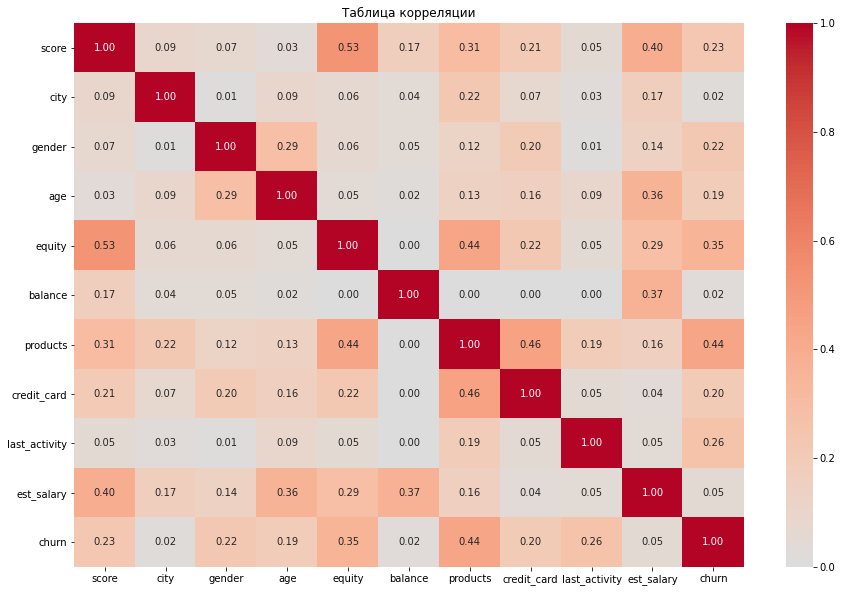

In [36]:
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr.phik_matrix(interval_cols = continuous_signs),
            center=0,
            annot = True,
            fmt = '.2f',
            cmap='coolwarm',
            ax = axes)
plt.title('Таблица корреляции')
plt.show()

**Шкала корреляции Чеддока**
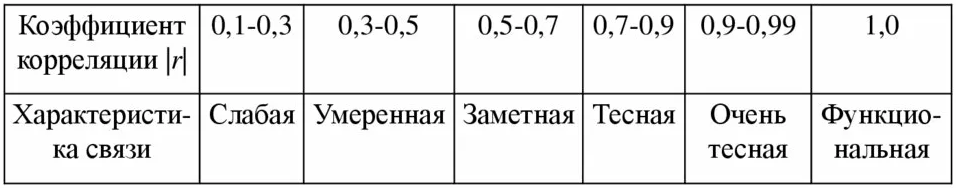

**По полученной таблице корреляции и шкале кор.Чеддока, подводим итоги, что завимость умеренная у оттока с количеством продуктов(0.44), количеством баллов собственности(0.35). Слабая зависимость у значения оттока с активностью клиента(0.26), баллом кредитного скоринга(0.23), гендер(0.22) и наличие кредитной карты(0.20).**

### ВЫВОД: По результатам проведения исследовательского анализа и аналика корреляции, были полученны пересечения признаков, а именно:

**Исследовательский анализ**
- Пользователей с баллом кредитного скоринга в диапазоне 820-900 баллов;
- Клиентов в возрастной группе от 25 до 35 лет и 50 до 60;
- С оценкой собственности от 3 до 9;
- С балансом более 1млн;
- Клиентов с количеством продуктов более 2;
- Пользователей из городов Ростов и Ярославль;
- Мужчин
- Клиентов не имеющие крединой карты;
- Активных клиентов.

**Корреляционный анализ**
- Клиенты по количеству продуктов(0.44).Умеренная зависимость
- Количеством баллов собственности(0.35).Умеренная зависимость
- Активность клиента(0.26).Слабая зависимость
- Балл кредитного скоринга(0.23).Слабая зависимость
- Гендер клиента и наличие у него кредитной карты(0.22,0.20).Слабая зависимость

**Благодаря этим двум анализам, мы получили явное направление и приоритет, для дальнейшего исследования оттока клиентов.**

## Составление и проверка статистических гипотез

### Составление гипотез и теоретическое обосвание для дальнейших проверок

**1) Гипотеза  о различии кредитного балла скоринга между клиентами, что ушли и теми, что остались**

**2) Гипотеза о различии оценочного дохода между клиентами, что ушли и теми, что остались**

**Критерий-тест Стьюдента предназначен для сравнения двух групп по количественному признаку.**

**Условия применения критерия-теста:**
1) исходная совокупность данных имеет нормальное распределение ;

2) дисперсии выборок не сильно отличаются друг от друга;

3) и это две независимые между собой выборки (независимые это значит, что в этих группах разные люди, а никак, например, до и после применения препарата у одной группы, люди должны быть разными, тогда группы являются несвязанными, либо независимыми), этот аспект стоит учитывать для выбора вида т-критерия Стьюдента, так как для парных выборок существует свой парный т-критерий (paired t-test).

In [37]:
# разделим данные на ушедших и оставшихся, для проверки условий выполнения ttest
# оставшиеся клиенты
df_stayed = df.loc[df["churn"] == 0]
df_stayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8180 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8180 non-null   int64  
 1   score          8180 non-null   float64
 2   city           8180 non-null   object 
 3   gender         8180 non-null   object 
 4   age            8155 non-null   float64
 5   equity         8180 non-null   int64  
 6   balance        5898 non-null   float64
 7   products       8180 non-null   int64  
 8   credit_card    8180 non-null   int64  
 9   last_activity  8180 non-null   int64  
 10  est_salary     8180 non-null   float64
 11  churn          8180 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 830.8+ KB


In [38]:
# разделим данные на ушедших и оставшихся, для проверки условий выполнения ttest
# ушедшие клиенты
df_gone = df.loc[df["churn"] == 1]
df_gone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1820 entries, 0 to 9994
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        1820 non-null   int64  
 1   score          1820 non-null   float64
 2   city           1820 non-null   object 
 3   gender         1820 non-null   object 
 4   age            1819 non-null   float64
 5   equity         1820 non-null   int64  
 6   balance        1807 non-null   float64
 7   products       1820 non-null   int64  
 8   credit_card    1820 non-null   int64  
 9   last_activity  1820 non-null   int64  
 10  est_salary     1820 non-null   float64
 11  churn          1820 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 184.8+ KB


**Разделенные данные имеют разницу в объёме(8180 строк и 1820 строк), но условие по распределению и независиомсти соблюдается. А пункт с дисперсией выборок мы не можем проверить, поэтому при использовании t-теста зададим параметр equal_var=False. Следовательно, мы можем использовать t-теста, а именно метод ttest_ind, так как он предназначен для проверки гипотезы о равенстве средних двух генеральных совокупностей. Так же в гипотезах используются количественные признаки.**


### Проверка гипотезы о различии кредитного балла скоринга между клиентами, что ушли и теми, что остались

- Нулевая гипотеза: средние пользовательские баллы скоринга клиентов что ушли и теми что остались одинаковые.
- Альтернативная гипотеза: средние пользовательские баллы скоринга клиентов что ушли и теми что остались разные.

alpha = 0.05

In [39]:
alpha = 0.05

results = st.ttest_ind(df_stayed['score'],
                       df_gone['score'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские баллы скоринга клиентов что ушли и теми что остались разные')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: средние пользовательские баллы скоринга клиентов что ушли и что остались одинаковые')

p-value: 1.2043086927657869e-37
Отвергаем нулевую гипотезу: средние пользовательские баллы скоринга клиентов что ушли и теми что остались разные


**По итогу теста, мы получаем, что баллы скоринга ушедших клиентов и оставшихся различаются.**

### Проверка гипотезы о различии оценочного дохода между клиентами, что ушли и теми, что остались

- Нулевая гипотеза: средние пользовательские доходы клиентов что ушли и теми что остались одинаковые.
- Альтернативная гипотеза: средние пользовательские доходы клиентов что ушли и теми что остались разные.

alpha = 0.05

In [40]:
alpha = 0.05

results = st.ttest_ind(df_stayed['est_salary'],
                       df_gone['est_salary'],
                       equal_var=False,
                       alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние пользовательские доходы клиентов что ушли и теми что остались разные')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: средние пользовательские доходы клиентов что ушли и что остались одинаковые')

p-value: 0.8887054822123845
Нет оснований отвергнуть нулевую гипотезу: средние пользовательские доходы клиентов что ушли и что остались одинаковые


**По итогу теста, мы получаем, что доходы ушедших клиентов и оставшихся одинаковые.**

### ВЫВОД: Составили две гипотезы и проверили их методом Стьюдента. В итоге получили, что баллы скоринга ушедших клиентов и оставшихся различаются, а доходы ушедших клиентов и оставшихся одинаковые.

## Подведение промежуточных выводов

**На данном этапе мы определим признаки и разбег в количественных признаках, для определения портрета клиента, которые имеет склонность к оттоку.**

1) После проведения исследовательского анализа, исполненного с помощью диаграм и других вызуализаций, были получены следующие признаки: 
- Пользователей с баллом кредитного скоринга в диапазоне 820-900 баллов.;
- Клиентов в возрастной группе от 25 до 35 лет и 50 до 60.;
- С оценкой собственности от 3 до 9;
- С балансом более 1млн;
- Клиентов с количеством продуктов более 2;
- Пользователей из городов Ростов и Ярославль;
- Мужчин;
- Клиентов не имеющие крединой карты;
- Активных клиентов;
- Оценочный доход 100к-200к.

2) Так же исследовательский анализ был выполнен блягодаря корреляционного анализа, и были получены следующие признаки:
- Клиенты по количеству продуктов(0.44).Умеренная зависимость
- Количеством баллов собственности(0.35).Умеренная зависимость
- Активность клиента(0.26).Слабая зависимость
- Балл кредитного скоринга(0.23).Слабая зависимость
- Гендер клиента и наличие у него кредитной карты(0.22,0.20).Слабая зависимость

3) Во время проведения 4 пункта, выполнялась проверка двух гипотез о разнице или сходстве средних показателей кредитного скоринга, дохода между ушедшими и оставшиеся клиентами:
- Проверка гипотезы о различии кредитного балла скоринга между клиентами, что ушли и теми, что остались.

*Результат: баллы скоринга ушедших клиентов и оставшихся различаются*

-  Проверка гипотезы о различии оценочного дохода между клиентами, что ушли и теми, что остались.

*Результат: доходы ушедших клиентов и оставшихся одинаковые*

**Выделим 3 сегмента, учитывая все перечисленные итоги.**

1 СЕГМЕНТ

**score** — баллы кредитного скоринга(820-900)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(25-35)

**equity** — количество баллов собственности(больше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(менее и равно 2)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(менее 200000)

2 СЕГМЕНТ

**score** — баллы кредитного скоринга(нет значения)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(50-60)

**equity** — количество баллов собственности(меньше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(более и равно 2)

**credit_card** — есть ли кредитная карта(отсутсвует)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(нет значения)

3 СЕГМЕНТ

**score** — баллы кредитного скоринга(820-900)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(любой)

**equity** — количество баллов собственности(3-9)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(больше и равно 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(0-200000)

В следующем пункте проверим перечисленные 3 сегмента, на целесообразность. Так, чтобы процент отточных клиентов превышал средний процентт оттока по банку.

## Сегментация

**Сегментация проведена по главным признакам, полученным по исследовательскому анализу, и их интервалам, а именно:**
- баллам кредитного скоринга
- возраст
- количеству баллов собственности
- количеству продуктов
- оценочному доходу клиентов

In [41]:
# среднебанковский уровень оттока
df['churn'].mean()*100

18.2

1 СЕГМЕНТ

**score** — баллы кредитного скоринга(любое)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(25-35)

**equity** — количество баллов собственности(больше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(меньше и равно 200000)

In [42]:
one = df.query (' equity>=5 and (age>=25 or age<=35) and products < 3 and est_salary <= 200000')['user_id'].count()

print ('Размер первого сегмента:', one)

one_proc = df.query (' equity>=5 and (age>=25 or age<=35) and products < 3 and est_salary <= 200000 and churn==1')['user_id'].count()

print ('Число отточных клиентов в первом сегменте:', one_proc)

one_rate = one_proc/one*100

print ('Процент отточных клиентов в первом сегменте:', one_rate)

Размер первого сегмента: 1403
Число отточных клиентов в первом сегменте: 332
Процент отточных клиентов в первом сегменте: 23.66357804704205


2 СЕГМЕНТ

**score** — баллы кредитного скоринга(нет значения)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(50-60)

**equity** — количество баллов собственности(меньше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(отсутсвует)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(нет значения)


In [43]:
two = df.query ('(age>=50 or age<=60) and equity <=5 and products < 3 and credit_card == 0')['user_id'].count()

print ('Размер второго сегмента:', two)

two_proc = df.query ('(age>=50 or age<=60) and equity <=5 and products < 3 and credit_card == 0 and churn==1')['user_id'].count()

print ('Число отточных клиентов во втором сегменте:', two_proc)

two_rate = two_proc/two*100

print ('Процент отточных клиентов во втором сегменте:', two_rate)

Размер второго сегмента: 2299
Число отточных клиентов во втором сегменте: 517
Процент отточных клиентов во втором сегменте: 22.48803827751196


3 СЕГМЕНТ

**score** — баллы кредитного скоринга(820-900)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(любой)

**equity** — количество баллов собственности(любое)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(больше и равно 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(100000-200000)

In [44]:
three = df.query ('(score>=820 or score<=900) and products >= 3 and (est_salary >= 100000 or est_salary <=200000)')['user_id'].count()

print ('Размер третьего сегмента:', three)

three_proc = df.query ('(score>=820 or score<=900) and products >= 3 and (est_salary >= 100000 or est_salary <=200000) and churn==1')['user_id'].count()

print ('Число отточных клиентов в третьем сегменте:', three_proc)

three_rate = three_proc/three*100

print ('Процент отточных клиентов в третьем сегменте:', three_rate)

Размер третьего сегмента: 1532
Число отточных клиентов в третьем сегменте: 605
Процент отточных клиентов в третьем сегменте: 39.49086161879896


### ВЫВОД: По результатам сегментации, мы получили 3 портрета(сегмента) клиентов, способные на отток.

- 1 СЕГМЕНТ

**score** — баллы кредитного скоринга(любое)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(25-35)

**equity** — количество баллов собственности(больше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(меньше и равно 200000)

- 2 СЕГМЕНТ

**score** — баллы кредитного скоринга(нет значения)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(50-60)

**equity** — количество баллов собственности(меньше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(отсутсвует)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(нет значения)

- 3 СЕГМЕНТ

**score** — баллы кредитного скоринга(820-900)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(любой)

**equity** — количество баллов собственности(любое)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(больше и равно 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(100000-200000)

## Приоритизация сегментов

**Определим для отдела маркетинга в каком приоритете стоит решить проблему оттока, какие признаки включают в себя клиенты, способные на отток**

In [45]:
result_table = pd.DataFrame({
    'User Count': [one, two, three],
    'Churn Count': [one_proc, two_proc, three_proc],
    'Churn Rate': [one_rate, two_rate, three_rate]
})
result_table.sort_values('Churn Rate', ascending=False, inplace=True)
result_table

,User Count,Churn Count,Churn Rate
2,1532,605,39.490862
0,1403,332,23.663578
1,2299,517,22.488038


**Все 3 сегмента превышают 18.2 процента оттока по банку. Приоритет для отдела маркитинга следующий:**
- на 1 месте 3 сегмент с процентом оттока 39.5
- на 2 месте 1 сегмент с процентом оттока 23.6
- на 3 месте 2 сегмент с процентом оттока 22.5

## Формирование общего вывода и ремендаций для отдела маркетинга

### Общий вывод: данный проект включил в себя этапы:
1) Загрузка и ознакомление с данными:
- Данный датасет имеет 12 столбцов, 10000 строк. Датасет был неполным, присутствовали пропуски. Необходимо было отредактировать наименования столбцов по нормам.

2) Подготовка и предобработка данных:
- При проверке на наличие явных и неявных дубликатов, было получено. Отсутствуют явные дубликаты, но присутствуют неявные. После уточнения и выяснения их природы, было принято решение, оставить без изменений, так как эти неявные дубликаты не имеют схожести, только по user_id.
- По графику корреляции признаков получили, что есть зависимость между пропусками в балансе и количеством баллов собственности(equity). А также присутствует зависимость с количеством продуктов(products) и баллами кредитного скоринга(score). То есть, пропуски зависят от данных (пропуски относятся к MNAR (Missing Not At Random / Отсутствует не случайно) и их стоит оставить без изменений.

3) Исследовательский анализ данных:
- Данный этап выполнялся двумя методами, по результатам визуализации(распределений) и корреляционного анализа. Благодаря которым получили признаки клиентов, имеющие склонность к оттоку:

**Исследовательский анализ**

 Пользователей с баллом кредитного скоринга в диапазоне 820-900 баллов;
 
 Клиентов в возрастной группе от 25 до 30 лет и 52 до 60;
 
 С оценкой собственности от 3 до 9;
 
 С балансом более 1млн;
 
 Клиентов с количеством продуктов более 2;
 
 Пользователей из городов Ростов и Ярославль;
 
 Мужчин;
 
 Клиентов не имеющие крединой карты;
 
 Активных клиентов.

**Корреляционный анализ**

 Клиенты по количеству продуктов(0.44).Умеренная зависимость;
 
 Количеством баллов собственности(0.35).Умеренная зависимость;
 
 Активность клиента(0.26).Слабая зависимость;
 
 Балл кредитного скоринга(0.23).Слабая зависимость;
 
 Гендер клиента и наличие у него кредитной карты(0.22,0.20).Слабая зависимость.
 
4) Составление и проверка гипотез:
- По результатам данного этапа были составлены две гипотезы, и проверили их методом Стьюдента. В итоге получили, что баллы скоринга ушедших клиентов и оставшихся различаются, а доходы ушедших клиентов и оставшихся одинаковые.

5) Сегментация и приоритизация:
- На данном этапе было сформировано 3 портрета клиента и проранжировано по важности для отдела маркетинга. Данные о клиентах, имеющие склонность к оттоку будут в разделе о рекомендациях для отдела маркетинга.
 

### Рекомендация для отдела маркетинга
**Проведя данное исследование, мы выявили зависимость между признаками клиентов и оттоком, такие как:**
- балл кредитного скоринга
- возраст клиента
- количество баллов собственности
- количество продуктов
- оценочный доход клиента

**По этим признакам было сформировано 3 сегмента и проверен процент оттока, сравнив его со средний банковским, тем самым обозначив приоритет решения**
- на 1 месте 3 сегмент с процентом оттока 39.5

**score** — баллы кредитного скоринга(820-900)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(любой)

**equity** — количество баллов собственности(любое)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(больше и равно 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(100000-200000)

- на 2 месте 1 сегмент с процентом оттока 23.6

**score** — баллы кредитного скоринга(любое)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(25-35)

**equity** — количество баллов собственности(больше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(нет значения)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(меньше и равно 200000)

- на 3 месте 2 сегмент с процентом оттока 22.5

**score** — баллы кредитного скоринга(нет значения)

**city** — город(любой)

**gender** — пол(любой)

**age** — возраст(50-60)

**equity** — количество баллов собственности(меньше и равно 5)

**balance** — баланс на счёте(любой)

**products** — количество продуктов, которыми пользуется клиент(меньше 3)

**credit_card** — есть ли кредитная карта(отсутсвует)

**last_activity** — активный клиент(нет значения)

**est_salary** — оценочный доход клиента(нет значения)

**Рекомендации:**
- Для 3 сегмента, который имеет наивысший приоритет, состоит из клиентов с кредитным скорингом(820-900), достаточным количеством продуктов, но низким оценочным доходом, следует провести опрос, мониторинг, который позволит выяснить отрицательные показатели. Банковские возможности, ставки, объём кредитования, процент вклада.


- Для 1 сегмента, котрый состоит из клиентов в возрасте(25-35), приемлемыми показателями по количеству собственности и продуктов и оценочным доходом менее 200000, следует предложить выгодную кешбэк программу, дав выбор на определнную сферу, например автомобильные запчасти, продукты, фитнес, развлечения.


- Для 2 сегмента, в который входят клиента в возрасте(50-60), имеют количество собственности до 5, но отсутсвует кредитная карта, необходимо предложить льготную программу кредитования, по этой причине, присутсвует потенциальность и способность удержания.